In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px


from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [7]:
pre_data = pd.read_csv("arquivos/oasis_cross-sectional.csv")

# Dados nulos

In [8]:
dados_nulos = pre_data.loc[pre_data['CDR'].isna()]

In [9]:
dados_nulos

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,NaN
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,1516,0.830,1.157,NaN
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


In [10]:
dados_nulos['Age'].describe()

count    201.000000
mean      26.820896
std        9.758471
min       18.000000
25%       20.000000
50%       23.000000
75%       28.000000
max       58.000000
Name: Age, dtype: float64

# Dados a usar

In [11]:
def load_data():
    data = pd.read_csv('arquivos/oasis_cross-sectional.csv')
    # Filtrar os dados onde MMSE e CDR não são nulos
    data = data.dropna(subset=['MMSE', 'CDR'])
    data.drop('Delay', axis=1, inplace=True)
    return data

data = load_data()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 0 to 415
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      235 non-null    object 
 1   M/F     235 non-null    object 
 2   Hand    235 non-null    object 
 3   Age     235 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    235 non-null    int64  
 9   nWBV    235 non-null    float64
 10  ASF     235 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 22.0+ KB


In [13]:
data.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,235.000000,235.000000,216.000000,235.00000,235.000000,235.000000,235.000000,235.000000
mean,72.344681,3.178723,2.490741,27.06383,0.285106,1459.497872,0.749132,1.216511
std,12.091369,1.311510,1.120593,3.69687,0.383405,160.368070,0.047906,0.129427
min,33.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000
25%,66.000000,2.000000,2.000000,26.00000,0.000000,1348.000000,0.713500,1.133500
50%,73.000000,3.000000,2.000000,29.00000,0.000000,1447.000000,0.747000,1.213000
75%,81.000000,4.000000,3.000000,30.00000,0.500000,1548.000000,0.784000,1.302000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.847000,1.563000


In [14]:
data.to_csv("dados.csv", index=False)

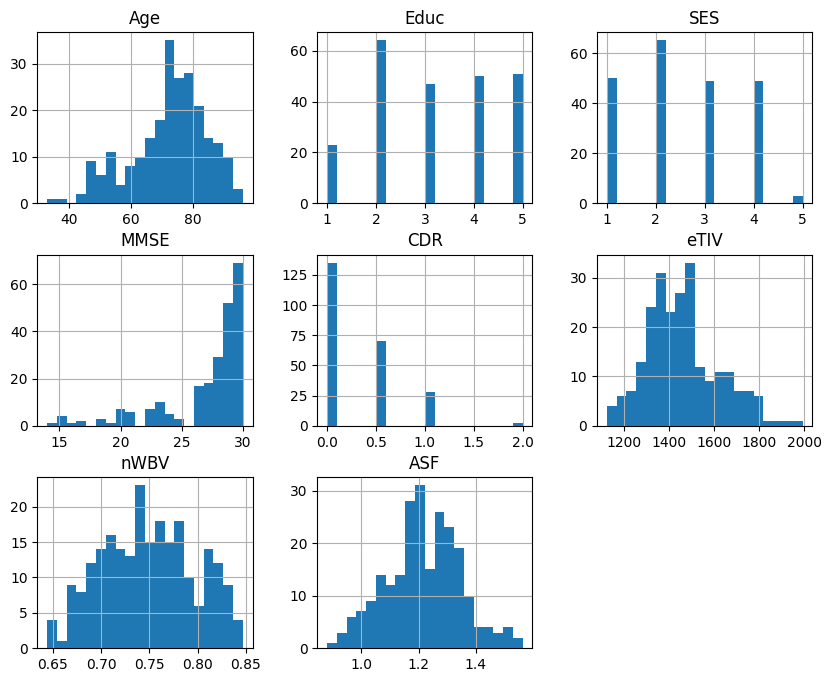

In [124]:
data.hist(figsize=(10, 8), bins=20)
plt.show()

### Testes normalidade


In [125]:
from scipy.stats import kstest, norm

# Exemplo de teste KS contra uma distribuição normal
stat, p = kstest(data.ASF, "norm")
print(f"Estatística de teste: {stat}")
print(f"Valor-p: {p}")

Estatística de teste: 0.8166968947504545
Valor-p: 5.83905778169531e-172


In [126]:
from scipy.stats import shapiro


# Aplicando o teste de Shapiro-Wilk
stat, p = shapiro(data.ASF)

print(f"Estatística de teste: {stat}")
print(f"Valor-p: {p}")

# Avaliação do resultado
if p > 0.05:
    print("Os dados parecem seguir uma distribuição normal (não rejeitamos H0).")
else:
    print("Os dados NÃO seguem uma distribuição normal (rejeitamos H0).")

Estatística de teste: 0.9941061813184167
Valor-p: 0.4886298623771559
Os dados parecem seguir uma distribuição normal (não rejeitamos H0).


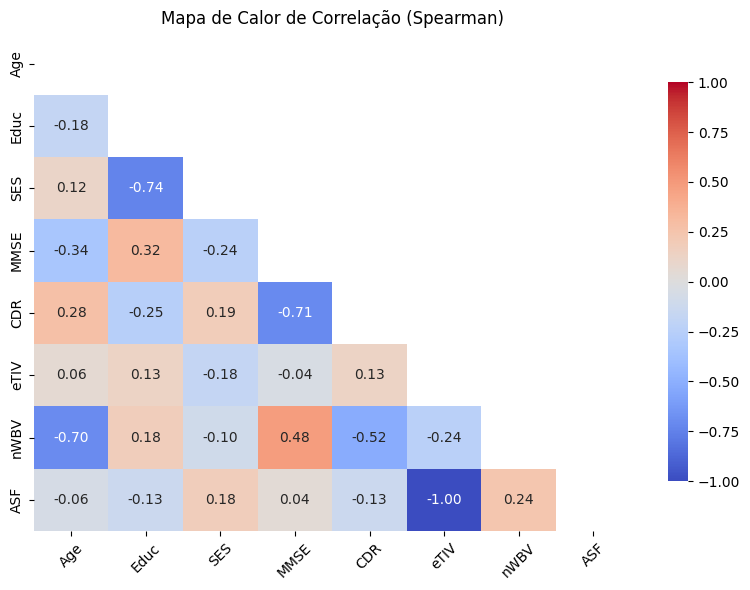

In [134]:
corr_spearman = data.corr(method='spearman', numeric_only=True)

mask = np.triu(np.ones_like(corr_spearman, dtype=bool))
# Plotar o heatmap
plt.figure(figsize=(8, 6))
heatmap =  sns.heatmap(
    corr_spearman,
    mask=mask,
    annot=True,       # Mostra os valores dentro dos quadrados
    fmt=".2f",        # Formato com 2 casas decimais
    cmap='coolwarm',  # Mapa de cores divergente
    center=0,         # Centraliza o branco em 0
    vmin=-1,          # Valor mínimo da escala
    vmax=1,           # Valor máximo da escala
    cbar_kws={"shrink": 0.8},
    yticklabels=True,
    xticklabels=True, # Ajusta o tamanho da barra de cores         
)

# Ajustes finais
plt.title("Mapa de Calor de Correlação (Spearman)")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X
plt.tight_layout()       # Melhora o espaçamento
plt.show()

## Testes estatisticos

### diferença de  nWBV entre doentes e não doentes

Text(0.5, 1.0, 'Distribuição de nWBV para Pacientes com CDR > 0 e Idade > 60')

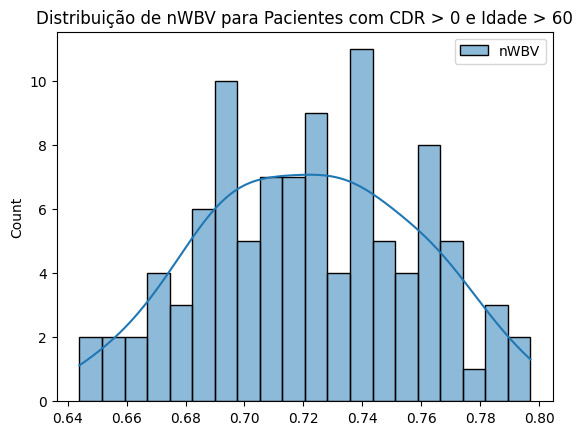

In [25]:
nwbv_doentes_maiores_60 = data.loc[(data['Age'] > 60) & (data['CDR'] >0), ['nWBV']].reset_index(drop=True)

sns.histplot(nwbv_doentes_maiores_60, bins=20, kde=True, color='blue')
plt.title('Distribuição de nWBV para Pacientes com CDR > 0 e Idade > 60')


<Axes: ylabel='Count'>

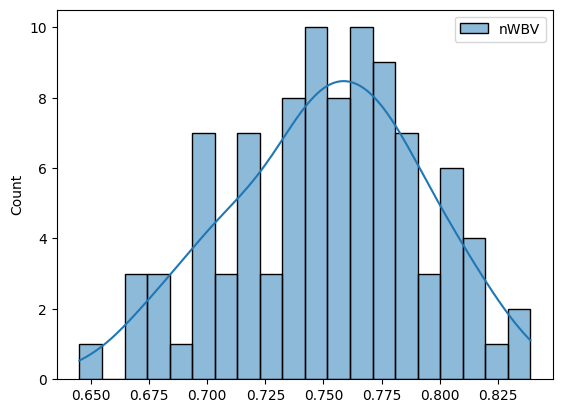

In [15]:
nwbv_nao_doentes_maiores_60 = data.loc[(data['Age'] > 60) & (data['CDR']  == 0), ['nWBV']]

sns.histplot(nwbv_nao_doentes_maiores_60, bins=20, kde=True, color='blue', label='Não Doentes Maiores de 60 anos')

In [21]:
# provando normalidade dos dados

from scipy.stats import shapiro

# Teste de normalidade para doentes (CDR > 0)
stat, p_doentes = shapiro(nwbv_doentes_maiores_60['nWBV'])
print(f"Doentes (CDR > 0): p-valor = {p_doentes:.4f}")

# Teste de normalidade para não doentes (CDR = 0)
stat, p_nao_doentes = shapiro(nwbv_nao_doentes_maiores_60['nWBV'])
print(f"Não doentes (CDR = 0): p-valor = {p_nao_doentes:.4f}")

Doentes (CDR > 0): p-valor = 0.4960
Não doentes (CDR = 0): p-valor = 0.6798


In [22]:
# temos distribuições normais, podemos usar o teste t de Student para comparar as médias entre os dois grupos.
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind, norm
# Teste t de Student para dois grupos independentes 
t_stat, p_value = ttest_ind(nwbv_doentes_maiores_60['nWBV'], nwbv_nao_doentes_maiores_60['nWBV'], equal_var=False)
print(f"Estatística t: {t_stat:.4f}, p-valor: {p_value:.4f}")   


Estatística t: -5.2987, p-valor: 0.0000


In [23]:
from scipy.stats import ttest_ind

# Teste t para amostras independentes
t_stat, p_valor = ttest_ind(
    nwbv_doentes_maiores_60['nWBV'],
    nwbv_nao_doentes_maiores_60['nWBV'],
    alternative='less'  # Teste unilateral: doentes têm nWBV menor
)

print(f"Teste t: p-valor = {p_valor:.4f}")

Teste t: p-valor = 0.0000


Observações:
Teste unilateral: Você está testando especificamente se os doentes têm valores menores, por isso usamos alternative='less'.

Hipótese nula (H₀): Não há diferença no nWBV entre os grupos (ou os doentes têm nWBV maior/igual).

Hipótese alternativa (H₁): Os doentes têm nWBV menor.

Se p-valor < 0.05: Rejeite a hipótese nula e conclua que os doentes têm nWBV significativamente menor.

Se p-valor ≥ 0.05: Não há evidências estatísticas para afirmar que os doentes têm nWBV menor.

In [24]:
# Exemplo de cálculo de Cohen's d (se usar teste t)
import numpy as np

def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

d = cohens_d(nwbv_doentes_maiores_60['nWBV'], nwbv_nao_doentes_maiores_60['nWBV'])
print(f"Cohen's d: {d:.2f}")

Cohen's d: -0.76


Um Cohen's d de -0.76 indica um efeito moderado a grande (na direção esperada) da diferença no volume cerebral normalizado (nWBV) entre os grupos.  

O sinal negativo indica que o primeiro grupo (doentes com CDR > 0) tem um nWBV menor que o segundo grupo (não doentes com CDR = 0), conforme sua hipótese.

### diferença de  MMSE entre doentes e não doentes

Text(0.5, 1.0, 'Distribuição de MMSE para Pacientes com CDR > 0 e Idade > 60')

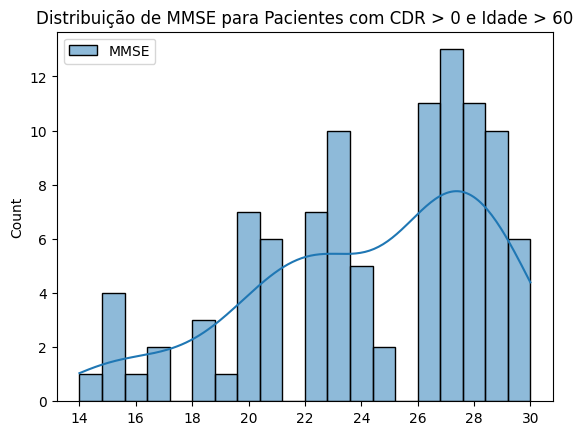

In [26]:
mmse_doentes_maiores_60 = data.loc[(data['Age'] > 60) & (data['CDR'] >0), ['MMSE']].reset_index(drop=True)

sns.histplot(mmse_doentes_maiores_60, bins=20, kde=True, color='blue')
plt.title('Distribuição de MMSE para Pacientes com CDR > 0 e Idade > 60')


Text(0.5, 1.0, 'Distribuição de MMSE para não Doentes e Idade > 60')

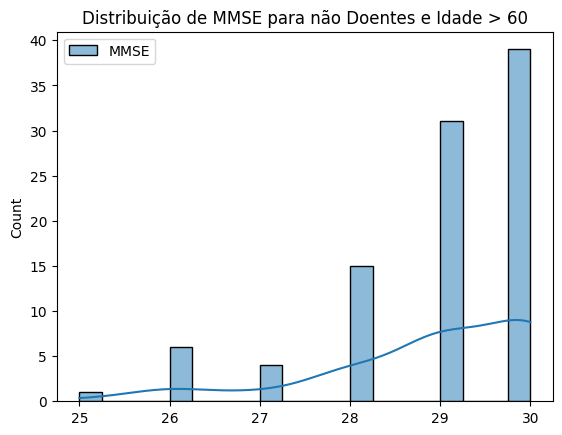

In [27]:
mmse_nao_doentes_maiores_60 = data.loc[(data['Age'] > 60) & (data['CDR'] ==0 ), ['MMSE']].reset_index(drop=True)

sns.histplot(mmse_nao_doentes_maiores_60, bins=20, kde=True, color='blue')
plt.title('Distribuição de MMSE para não Doentes e Idade > 60')

In [28]:
# provando normalidade dos dados

from scipy.stats import shapiro

# Teste de normalidade para doentes (CDR > 0)
stat, p_doentes = shapiro(mmse_doentes_maiores_60['MMSE'])
print(f"Doentes (CDR > 0): p-valor = {p_doentes:.4f}")

# Teste de normalidade para não doentes (CDR = 0)
stat, p_nao_doentes = shapiro(mmse_nao_doentes_maiores_60['MMSE'])
print(f"Não doentes (CDR = 0): p-valor = {p_nao_doentes:.4f}")

Doentes (CDR > 0): p-valor = 0.0001
Não doentes (CDR = 0): p-valor = 0.0000


In [29]:
# dados não normais

from scipy.stats import mannwhitneyu

# Teste de Mann-Whitney U
u_stat, p_valor = mannwhitneyu(
    mmse_doentes_maiores_60['MMSE'],
    mmse_nao_doentes_maiores_60['MMSE'],
    alternative='less'  # Teste unilateral: doentes têm MMSE menor
)

print(f"Teste U de Mann-Whitney: p-valor = {p_valor:.4f}")

Teste U de Mann-Whitney: p-valor = 0.0000


Observações:
Teste unilateral: Você está testando especificamente se os doentes têm valores menores, por isso usamos alternative='less'.

Hipótese nula (H₀): Não há diferença no MMSE entre os grupos (ou os doentes têm nWBV maior/igual).

Hipótese alternativa (H₁): Os doentes têm MMSE menor.

Se p-valor < 0.05: Rejeite a hipótese nula e conclua que os doentes têm MMSE significativamente menor.

Se p-valor ≥ 0.05: Não há evidências estatísticas para afirmar que os doentes têm MMSE menor.

## mais coisas

In [128]:
cdr_table = data.groupby(['CDR']).size().reset_index(name='Count')
cdr_table

,CDR,Count
0,0.0,135
1,0.5,70
2,1.0,28
3,2.0,2


In [156]:
cdr_descricao = {
    0.0: 'Sem demência',
    0.5: 'Demência muito leve',
    1.0: 'Demência leve',
    2.0: 'Demência moderada'
}

cdr_table = data2.groupby(['CDR']).size().reset_index(name='Count')

# Substituir os valores da coluna CDR
cdr_table['CDR'] = cdr_table['CDR'].map(cdr_descricao)

# Renomear a coluna 'Count' para 'Contagem'
cdr_table = cdr_table.rename(columns={'Count': 'Contagem'})

cdr_table.reset_index(drop=True, inplace=True)

print(cdr_table)

                   CDR  Contagem
0         Sem demência       135
1  Demência muito leve        70
2        Demência leve        28
3    Demência moderada         2


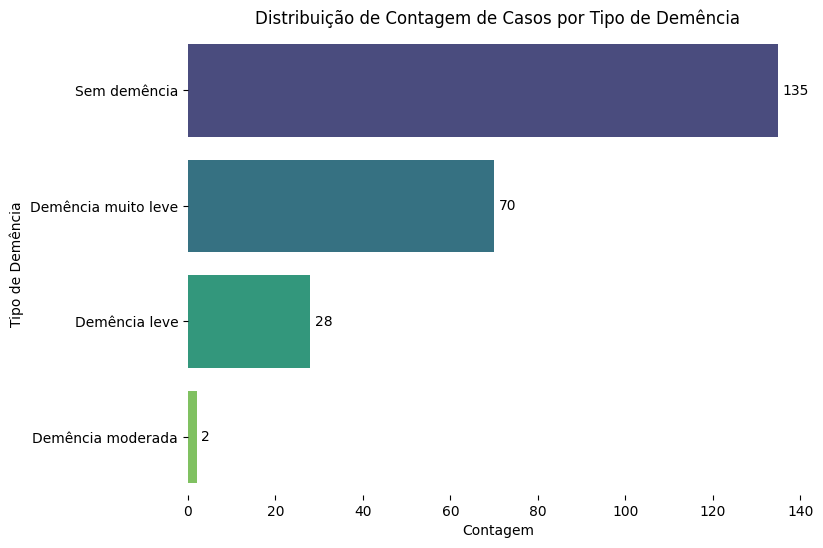

In [165]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Contagem', y='CDR', data=cdr_table, hue='CDR', palette='viridis', dodge=False)

for index, row in cdr_table.iterrows():
    ax.text(row['Contagem'] + 1, index, str(row['Contagem']), color='black', va='center')


# Remover as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Adicionando títulos e rótulos
plt.title('Distribuição de Contagem de Casos por Tipo de Demência')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Demência')

# Exibindo o gráfico
plt.show()

In [28]:
com_demencia = data.loc[data['CDR'] > 0]

com_demencia 

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
13,OAS1_0015_MR1,M,R,76,2.0,NaN,28.0,0.5,1738,0.719,1.010
14,OAS1_0016_MR1,M,R,82,2.0,4.0,27.0,0.5,1477,0.739,1.188
19,OAS1_0021_MR1,F,R,80,3.0,3.0,23.0,0.5,1794,0.765,0.978
20,OAS1_0022_MR1,F,R,69,2.0,4.0,23.0,0.5,1447,0.757,1.213
...,...,...,...,...,...,...,...,...,...,...,...
405,OAS1_0447_MR1,F,R,92,4.0,1.0,24.0,0.5,1388,0.739,1.264
409,OAS1_0451_MR1,M,R,73,5.0,3.0,27.0,0.5,1687,0.728,1.040
410,OAS1_0452_MR1,M,R,75,1.0,4.0,22.0,1.0,1656,0.762,1.060
411,OAS1_0453_MR1,F,R,70,1.0,4.0,29.0,0.5,1295,0.748,1.355


In [30]:
colunas_de_interese = ["M/F", "Hand", "Age", "Educ", "SES", "MMSE", "nWBV", "eTIV","ASF", "CDR"]

In [31]:
com_demencia = com_demencia[colunas_de_interese]

In [32]:
com_demencia

,M/F,Hand,Age,Educ,SES,MMSE,nWBV,eTIV,ASF,CDR
2,F,R,73,4.0,3.0,27.0,0.708,1454,1.207,0.5
13,M,R,76,2.0,NaN,28.0,0.719,1738,1.010,0.5
14,M,R,82,2.0,4.0,27.0,0.739,1477,1.188,0.5
19,F,R,80,3.0,3.0,23.0,0.765,1794,0.978,0.5
20,F,R,69,2.0,4.0,23.0,0.757,1447,1.213,0.5
...,...,...,...,...,...,...,...,...,...,...
405,F,R,92,4.0,1.0,24.0,0.739,1388,1.264,0.5
409,M,R,73,5.0,3.0,27.0,0.728,1687,1.040,0.5
410,M,R,75,1.0,4.0,22.0,0.762,1656,1.060,1.0
411,F,R,70,1.0,4.0,29.0,0.748,1295,1.355,0.5


## CDR vs Age

In [ ]:
bins_age = [30, 40, 50, 60, 70, 80, 90, 100]
labels_age = ['30-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

data['Age_Range'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age)

# Tabela para CDR por intervalo de idade
cdr_age_table = data.groupby(['Age_Range', 'CDR'], observed=True).size().reset_index(name='Count')

cdr_age_table  = cdr_age_table.pivot(index='Age_Range', columns='CDR', values='Count').fillna(0)

cdr_age_table


CDR,0.0,0.5,1.0,2.0
Age_Range,,,,
30-40,2.0,0.0,0.0,0.0
41-50,14.0,0.0,0.0,0.0
51-60,23.0,0.0,0.0,0.0
61-70,26.0,16.0,3.0,0.0
71-80,38.0,34.0,17.0,1.0
81-90,29.0,18.0,7.0,1.0
91-100,3.0,2.0,1.0,0.0


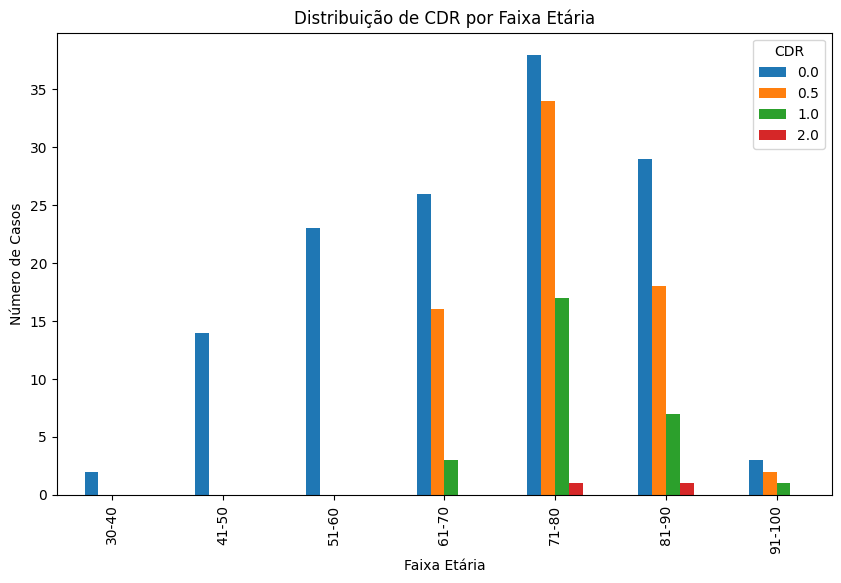

In [ ]:
# Gráfico de barras agrupadas
cdr_age_table.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de CDR por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Casos')
plt.legend(title='CDR')
plt.show()

## CDR vs MMSE

In [ ]:
data["CDR"] = data["CDR"].astype(str)

# Criar o gráfico
fig = px.box(data, y="MMSE", x='CDR', color='CDR', title='Box Plot of MMSE by Clinical Dementia Rating (CDR)')

# Atualizar layout
fig.update_layout(
    xaxis_title='CDR',
    yaxis_title="MMSE"
)

fig.show()

In [ ]:
media_mmse_por_cdr = data.groupby('CDR')['MMSE'].mean().reset_index(name='MMSE médio')
media_mmse_por_cdr

,CDR,MMSE médio
0,0.0,29.096296
1,0.5,25.642857
2,1.0,21.678571
3,2.0,15.000000


## CDR vs nWBV

In [139]:
fig = px.box(data, y="nWBV", x='CDR', color='CDR', title=f'Box Plot of nWBV by Clinical Dementia Rating (CDR)')
fig.update_layout(xaxis_title='CDR', yaxis_title="nWBV")
fig.show()

In [ ]:
media_mmse_por_cdr = data.groupby('CDR')['nWBV'].mean().reset_index(name='nWBV médio')
media_mmse_por_cdr

,CDR,nWBV médio
0,0.0,0.769230
1,0.5,0.729414
2,1.0,0.706179
3,2.0,0.684000


In [166]:
# Criando o histograma com gráficos separados para cada CDR
fig = px.histogram(
    data, 
    x="nWBV", 
    color='CDR', 
    facet_col='CDR', 
    title="Distribuição de nWBV por Clinical Dementia Rating (CDR)"
)

# Ajustando os títulos e layout do gráfico
fig.update_layout(
    xaxis_title='nWBV',
    yaxis_title='Contagem',
    showlegend=False
)
fig.show()

In [33]:
data

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...,...,...
411,OAS1_0453_MR1,F,R,70,1.0,4.0,29.0,0.5,1295,0.748,1.355
412,OAS1_0454_MR1,F,R,73,3.0,2.0,23.0,0.5,1536,0.730,1.142
413,OAS1_0455_MR1,F,R,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
414,OAS1_0456_MR1,M,R,61,5.0,2.0,30.0,0.0,1637,0.780,1.072
